
## INTRODUCTION

<div style="padding:4px">


This dataset is a collection of credit card cliets of a credit issuing company.  
The goal is to determine clients will make default or not on the next month.

Target variable:
NO Default = 0, YES Default = 1

## IMPORT

In [3]:
import pandas as pd   
import numpy as np   
import seaborn as sns  
import matplotlib.pyplot as plt  
from matplotlib import pyplot  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler  
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from numpy import where
from collections import Counter
from termcolor import colored

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

# !pip install imbalanced-learn &> /dev/null
# !pip install imblearn &> /dev/null
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
 
import warnings
warnings.filterwarnings("ignore")
 
pd.set_option('display.max_columns', 30)

print(colored("\nNECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))


NECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...


In [5]:
df = pd.read_csv("UCI_Credit_Card.csv")
df = df.drop("ID", axis = 1)
df.head(n = 10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   
5    50000.0    1          1         2   37      0      0      0      0   
6   500000.0    1          1         2   29      0      0      0      0   
7   100000.0    2          2         2   23      0     -1     -1      0   
8   140000.0    2          3         1   28      0      0      2      0   
9    20000.0    1          3         2   35     -2     -2     -2     -2   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   
5      0      0    64400.0    57069.0    57608.0    19394.0    19619.0   
6      0      0   367965.0   412023.0   445007.0   542653.0   483003.0   
7      0     -1    11876.0      380.0      601.0      221.0     -159.0   
8      0      0    11285.0    14096.0    12108.0    12211.0    11793.0   
9     -1     -1        0.0        0.0        0.0        0.0    13007.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   
5    20024.0    2500.0    1815.0     657.0    1000.0    1000.0     800.0   
6   473944.0   55000.0   40000.0   38000.0   20239.0   13750.0   13770.0   
7      567.0     380.0     601.0       0.0     581.0    1687.0    1542.0   
8     3719.0    3329.0       0.0     432.0    1000.0    1000.0    1000.0   
9    13912.0       0.0       0.0       0.0   13007.0    1122.0       0.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0

## INITIAL INFORMATION ABOUT DATASET

####  Change Column Names

In [6]:
df.rename(columns = {"LIMIT_BAL" : "limit_bal", "SEX" : "sex", "EDUCATION" : "education", "MARRIAGE" : "marriage","AGE":"age",
                     "PAY_0":"pay_0", "PAY_2":"pay_2", "PAY_3":"pay_3", "PAY_4":"pay_4","PAY_5":"pay_5", "PAY_6":"pay_6","BILL_AMT1":"bill_amt_1", 
                     "BILL_AMT2":"bill_amt_2","BILL_AMT3":"bill_amt_3", "BILL_AMT4":"bill_amt_4", "BILL_AMT5":"bill_amt_5",
                     "BILL_AMT6":"bill_amt_6", "PAY_AMT1":"pay_amt_1", "PAY_AMT2":"pay_amt_2", "PAY_AMT3":"pay_amt_3", "PAY_AMT4":"pay_amt_4", 
                     "PAY_AMT5":"pay_amt_5", "PAY_AMT6":"pay_amt_6", "default.payment.next.month":"default"
                     },
          inplace = True)

print(colored("\nTHE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...", color = "green", attrs = ["bold", "dark"]))


THE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...


#### Basic Information About Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   limit_bal   30000 non-null  float64
 1   sex         30000 non-null  int64  
 2   education   30000 non-null  int64  
 3   marriage    30000 non-null  int64  
 4   age         30000 non-null  int64  
 5   pay_0       30000 non-null  int64  
 6   pay_2       30000 non-null  int64  
 7   pay_3       30000 non-null  int64  
 8   pay_4       30000 non-null  int64  
 9   pay_5       30000 non-null  int64  
 10  pay_6       30000 non-null  int64  
 11  bill_amt_1  30000 non-null  float64
 12  bill_amt_2  30000 non-null  float64
 13  bill_amt_3  30000 non-null  float64
 14  bill_amt_4  30000 non-null  float64
 15  bill_amt_5  30000 non-null  float64
 16  bill_amt_6  30000 non-null  float64
 17  pay_amt_1   30000 non-null  float64
 18  pay_amt_2   30000 non-null  float64
 19  pay_amt_3   30000 non-nul

In [8]:
df.shape

(30000, 24)

#### Check null Values

In [9]:
print("There are total {} null values in the dataset".format(df.isnull().sum().sum()))

There are total 0 null values in the dataset


In [10]:
df['default'].value_counts(normalize = True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

#### Descriptive statistics of numeric variables

In [12]:
df.describe()

limit_bal           sex     education      marriage           age  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              pay_0         pay_2         pay_3         pay_4         pay_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              pay_6     bill_amt_1     bill_amt_2    bill_amt_3  \
count  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000  964511.000000  983931.000000  1.664089e+06   

          bill_amt_4     bill_amt_5     bill_amt_6      pay_amt_1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

          pay_amt_2     pay_amt_3      pay_amt_4      pay_amt_5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

           pay_amt_6       default  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000

## DATA VISUALIZATION

<a id="5.1"></a>

#### <b>5.1 <span style='color:#422e13'>|</span> Heatmap</b>

In [13]:
plt.figure(figsize = [25, 15], clear = True, facecolor = "white")
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "#006400", cmap = "viridis");

<a id="5.2"></a>

#### <b>5.2 <span style='color:#422e13'>|</span> Pie chart</b>

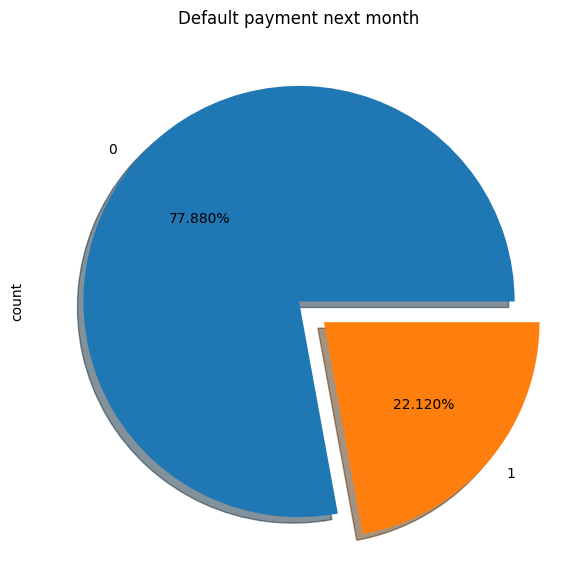

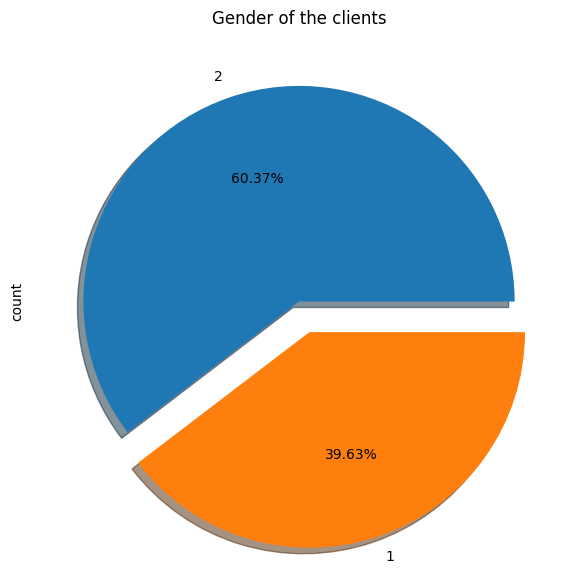

In [14]:
plt.figure(figsize = [20, 7], clear = True, facecolor = "#FFFFFF")
plt.title("Default payment next month")
df["default"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.3f%%', shadow = True);

plt.figure(figsize = [7, 7], clear = True, facecolor = "#FFFFFF")
plt.title("Gender of the clients")
df["sex"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.2f%%', shadow = True);

<a id="5.3"></a>

#### <b>5.3 <span style='color:#422e13'>|</span> Barplot</b>

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 30000 and the vector passed to `x` has length 2.

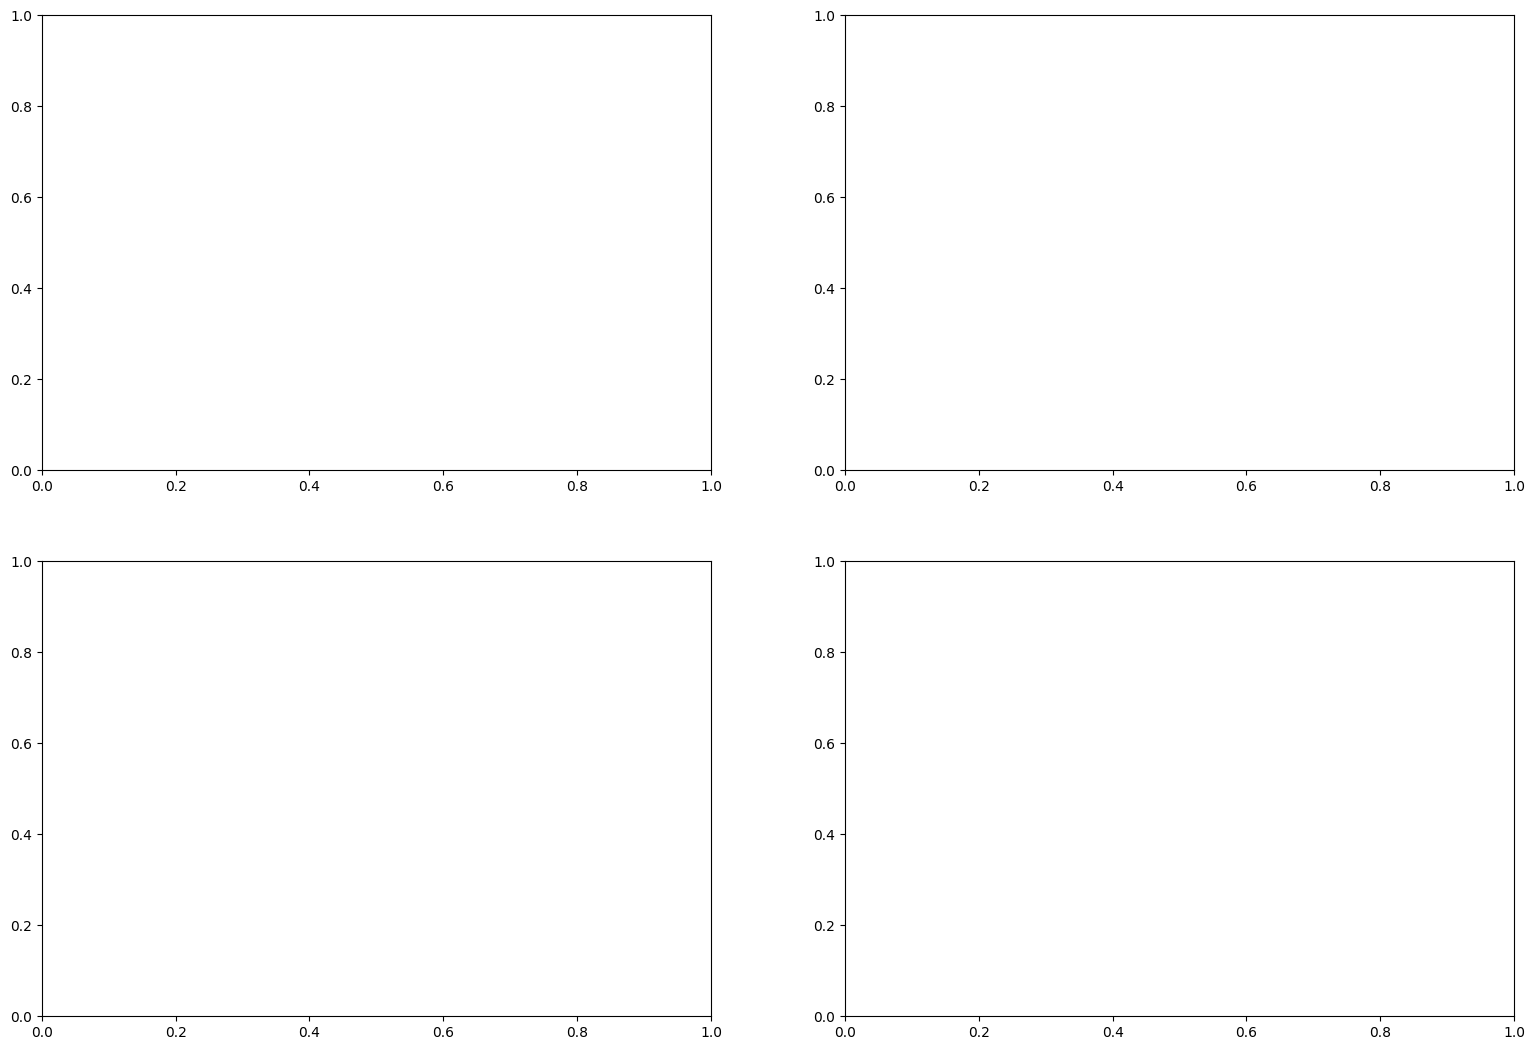

In [15]:
fig, axes = plt.subplots(2, 2, figsize = (19, 13))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = df["sex"].value_counts().index,
            y = df["sex"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the 'sex' variable");

sns.barplot(ax = axes[1],
            x = df["education"].value_counts().index,
            y = df["education"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of 'education' column");

sns.barplot(ax = axes[2],
            x = df["marriage"].value_counts().index,
            y = df["marriage"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of 'marriage' variable");

sns.barplot(ax = axes[3],
            x = df["default"].value_counts().index,
            y = df["default"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of classes of the target variable 'Default' ");

<a id="5.4"></a>

#### <b>5.4 <span style='color:#422e13'>|</span> Catplot</b>

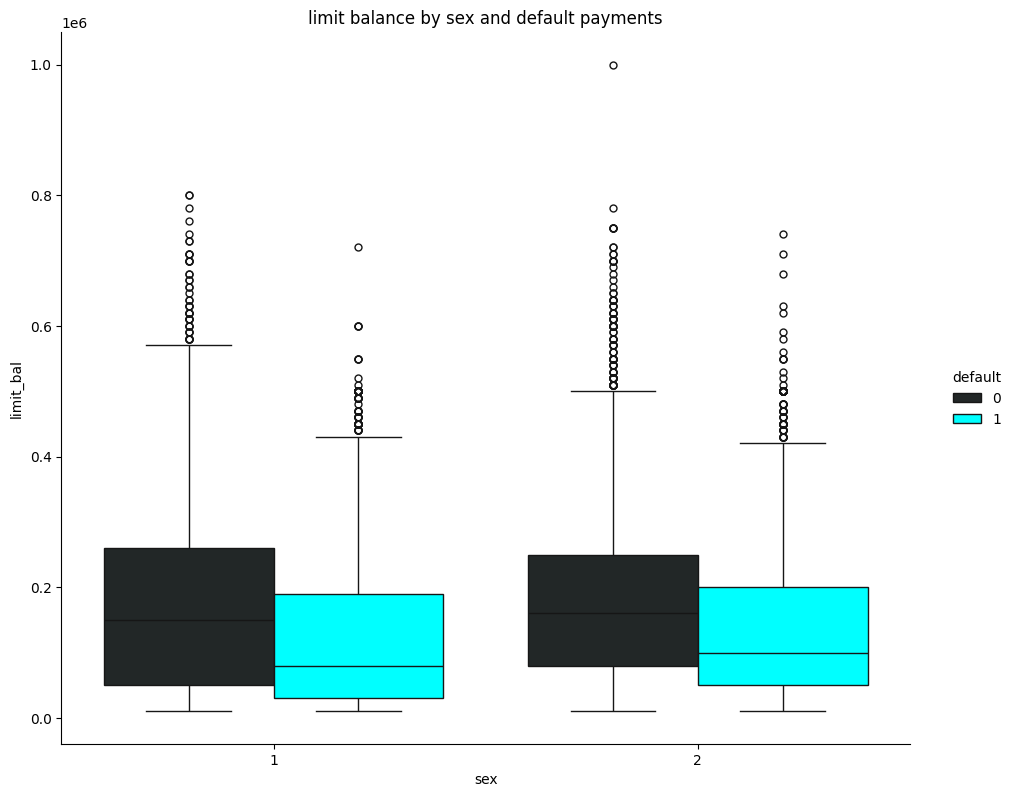

In [16]:
sns.catplot(x = "sex",
            y = "limit_bal",
            kind = "box",
            hue = "default",
            color = '#00FFFF',
            data = df, saturation = 1, height = 8, aspect = 1.2,
            margin_titles = True).set(title = "limit balance by sex and default payments");

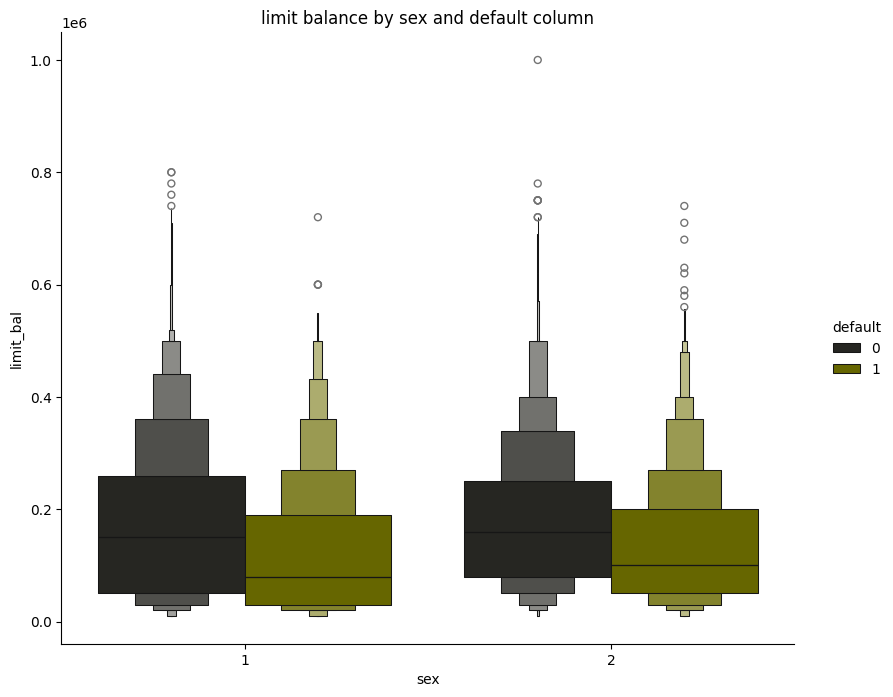

In [17]:
sns.catplot(x = "sex",
            y = "limit_bal",
            hue = "default",
            kind = "boxen",
            color = '#666600',
            data = df, saturation = 1, height = 7, aspect = 1.2,
            margin_titles = True).set(title = "limit balance by sex and default column");

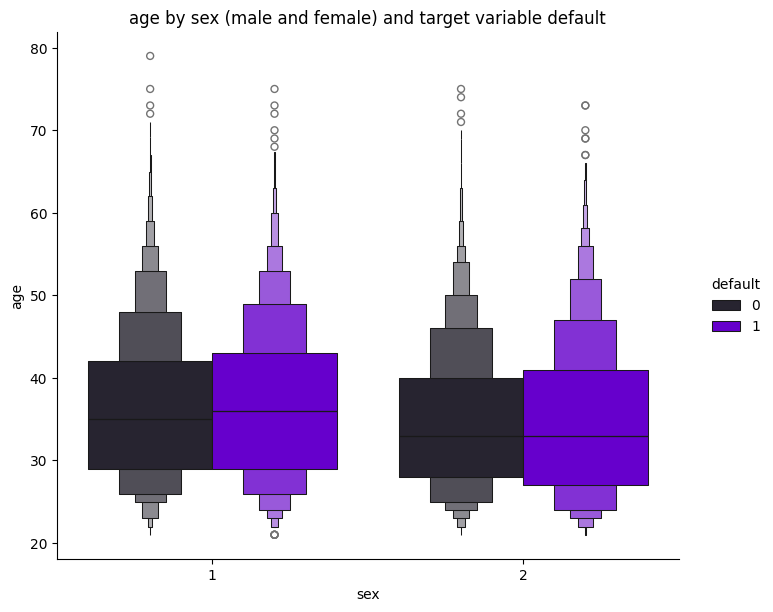

In [18]:
sns.catplot(x = "sex",
            y = "age",
            hue = "default",
            kind = "boxen",
            color = '#6600CC',
            data = df, saturation = 1, height = 6, aspect = 1.2,
            margin_titles = True).set(title = "age by sex (male and female) and target variable default");

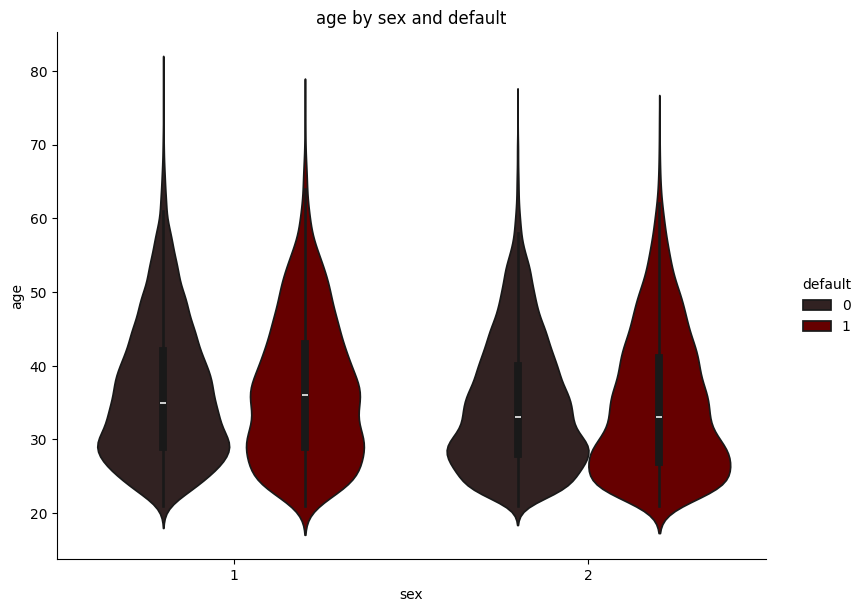

In [19]:
sns.catplot(x = "sex",
            y = "age",
            hue = "default",
            kind = "violin",
            color = '#660000',
            data = df, saturation = 1, height = 6, aspect = 1.35,
            margin_titles = True).set(title = "age by sex and default");

<a id="5.5"></a>

#### <b>5.5 <span style='color:#422e13'>|</span> Pairplot</b>

In [20]:
sns.pairplot(df, diag_kind = "hist", height = 4, aspect = 1, corner = True);

<a id="5.6"></a>

#### <b>5.6 <span style='color:#422e13'>|</span> Scatterplot</b>

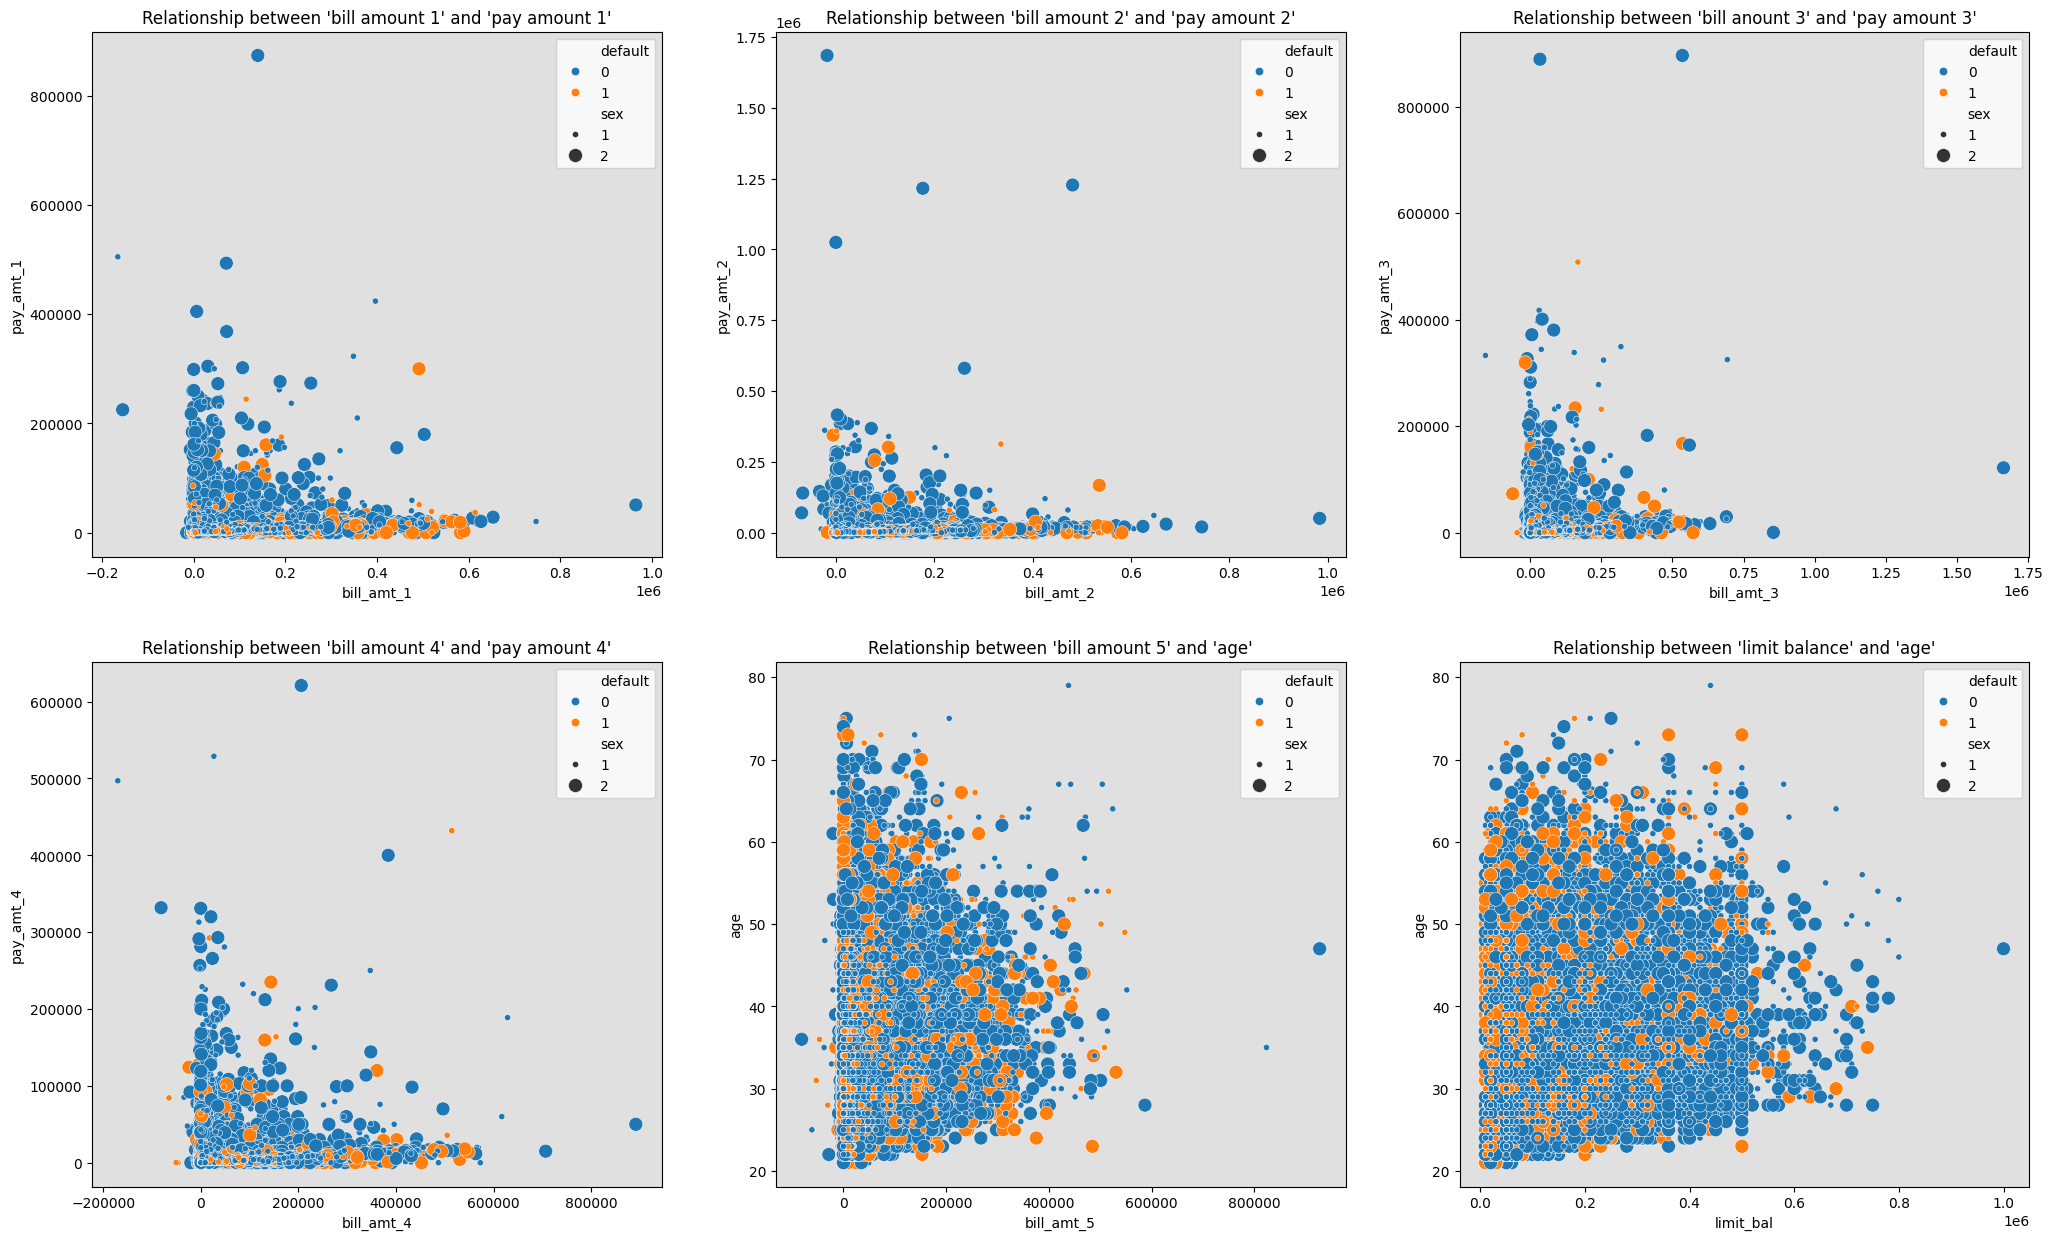

In [21]:
fig, axes = plt.subplots(2, 3, figsize = (25, 15))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "bill_amt_1", y = "pay_amt_1", hue = "default", size = "sex", sizes = (20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 1' and 'pay amount 1'");
axes[0].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[1], x = "bill_amt_2", y = "pay_amt_2", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 2' and 'pay amount 2'");
axes[1].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[2], x = "bill_amt_3", y = "pay_amt_3", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill anount 3' and 'pay amount 3'");
axes[2].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[3], x = "bill_amt_4", y = "pay_amt_4", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 4' and 'pay amount 4'");
axes[3].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[4], x = "bill_amt_5", y = "age", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 5' and 'age'");
axes[4].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[5], x = "limit_bal", y = "age", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'limit balance' and 'age'");
axes[5].set_facecolor("#E0E0E0")

<a id="5.7"></a>

#### <b>5.7 <span style='color:#422e13'>|</span> Distplot</b>

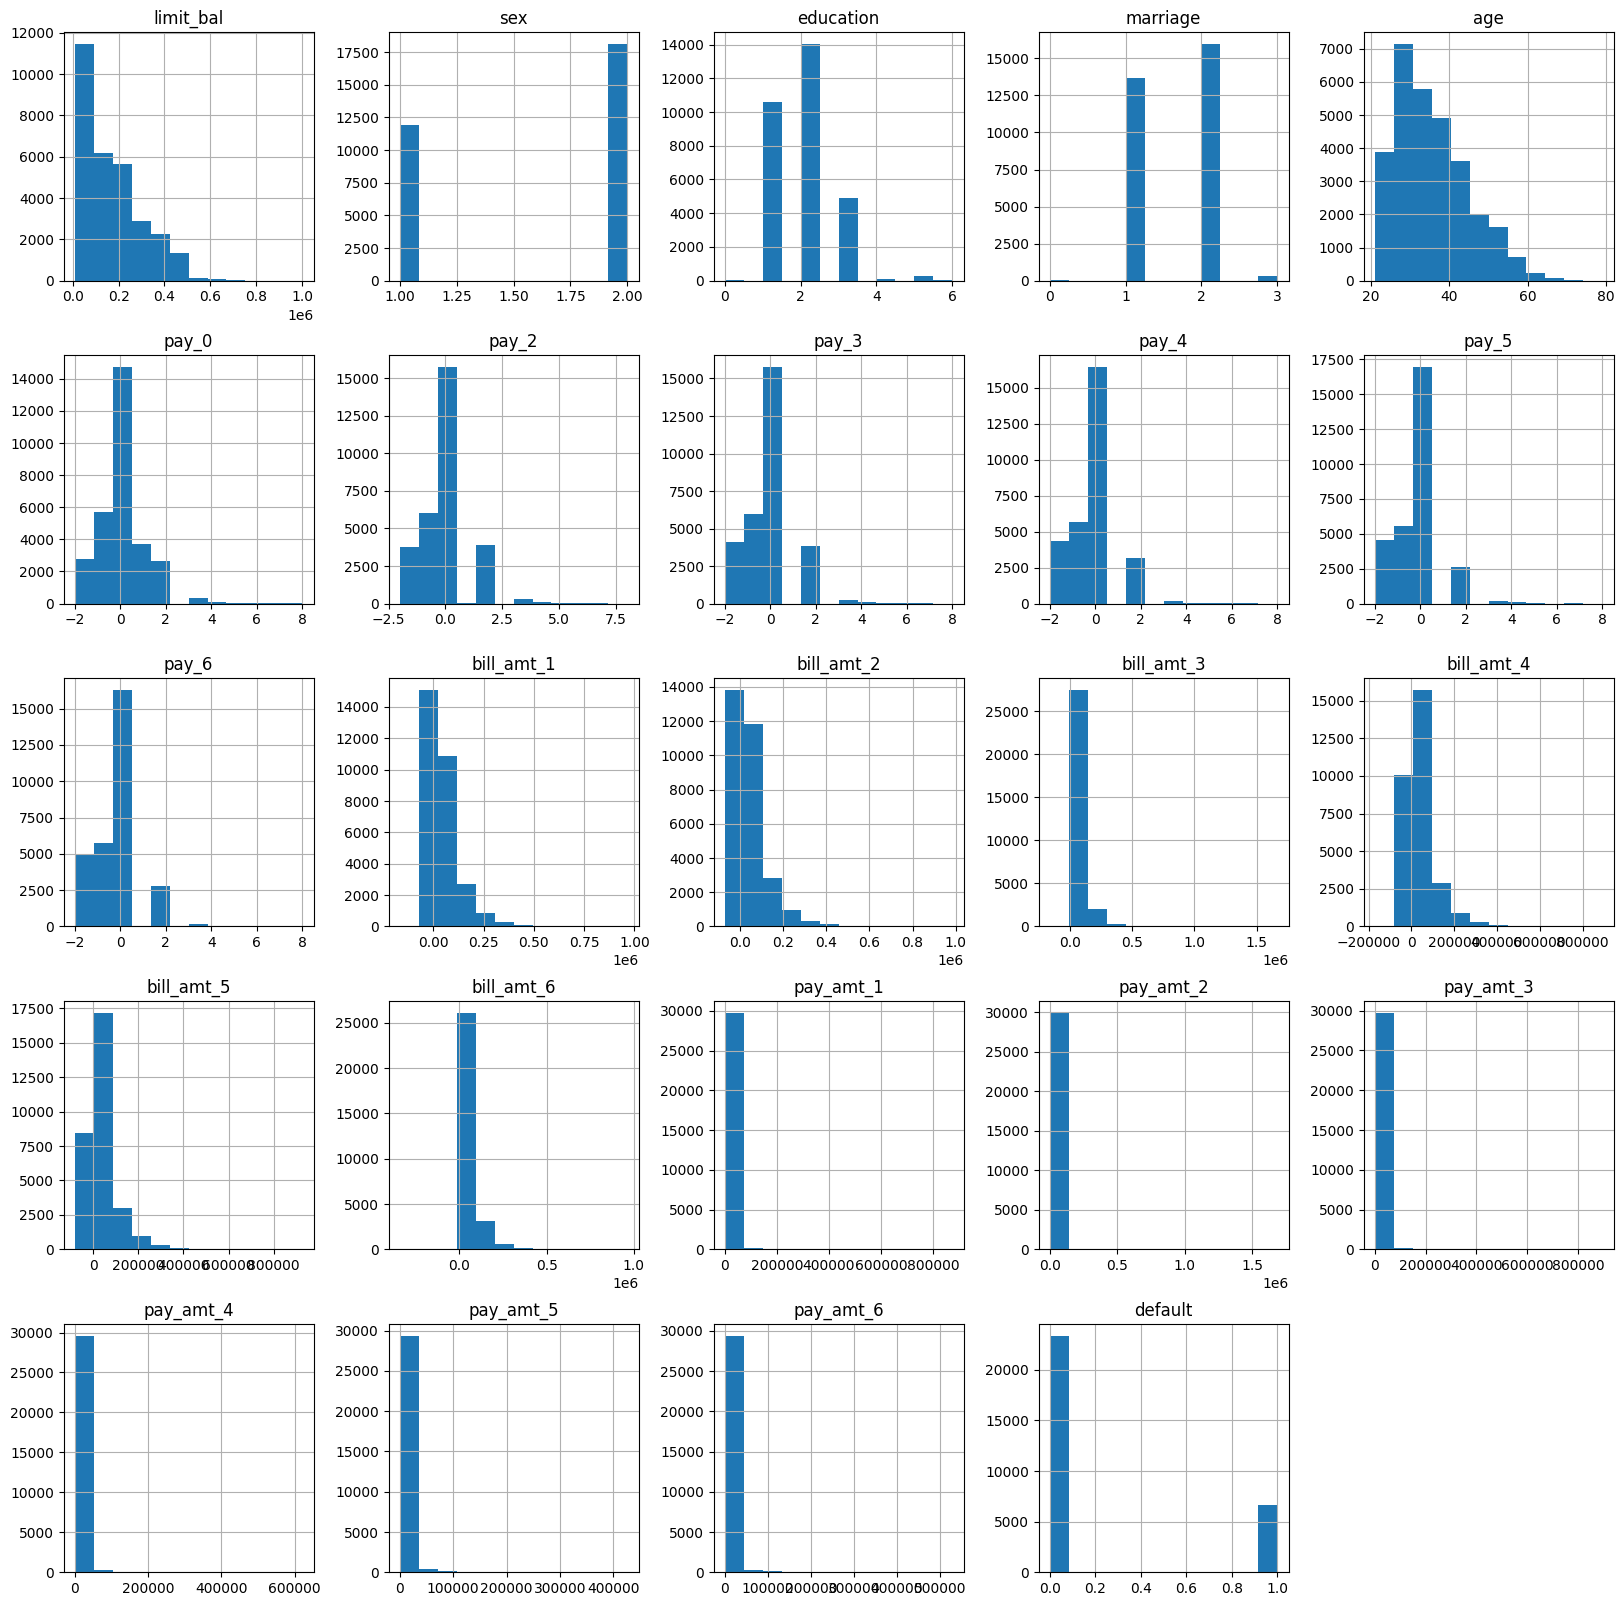

In [22]:
df.hist(figsize = (20, 20), bins = 12, legend = False, grid = True);

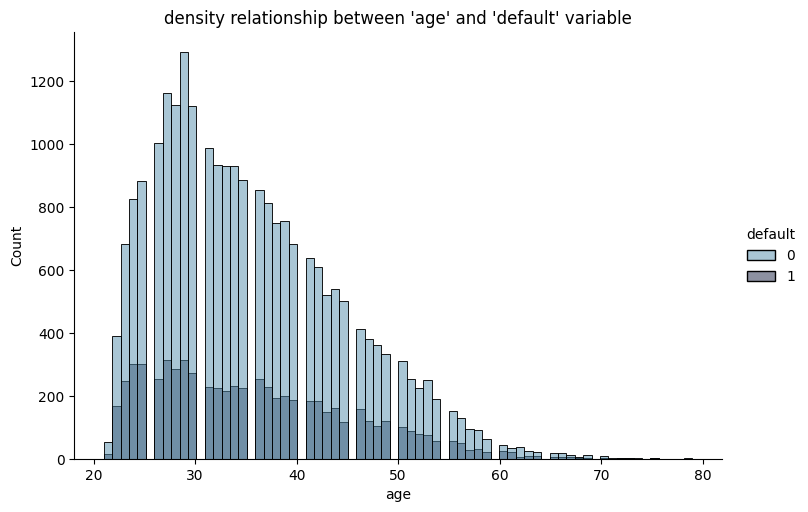

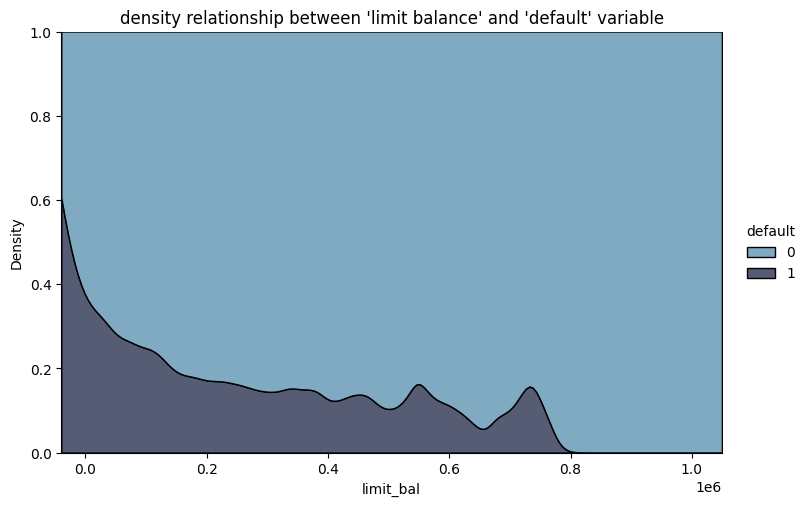

In [24]:
sns.displot(data = df, x = "age", hue = "default", kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "density relationship between 'age' and 'default' variable");

sns.displot(data = df, x = "limit_bal", hue = "default", kind = "kde", height = 5, aspect = 1.5, multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'limit balance' and 'default' variable");


<a id="5.8"></a>

#### <b>5.8 <span style='color:#422e13'>|</span> Regplot</b>

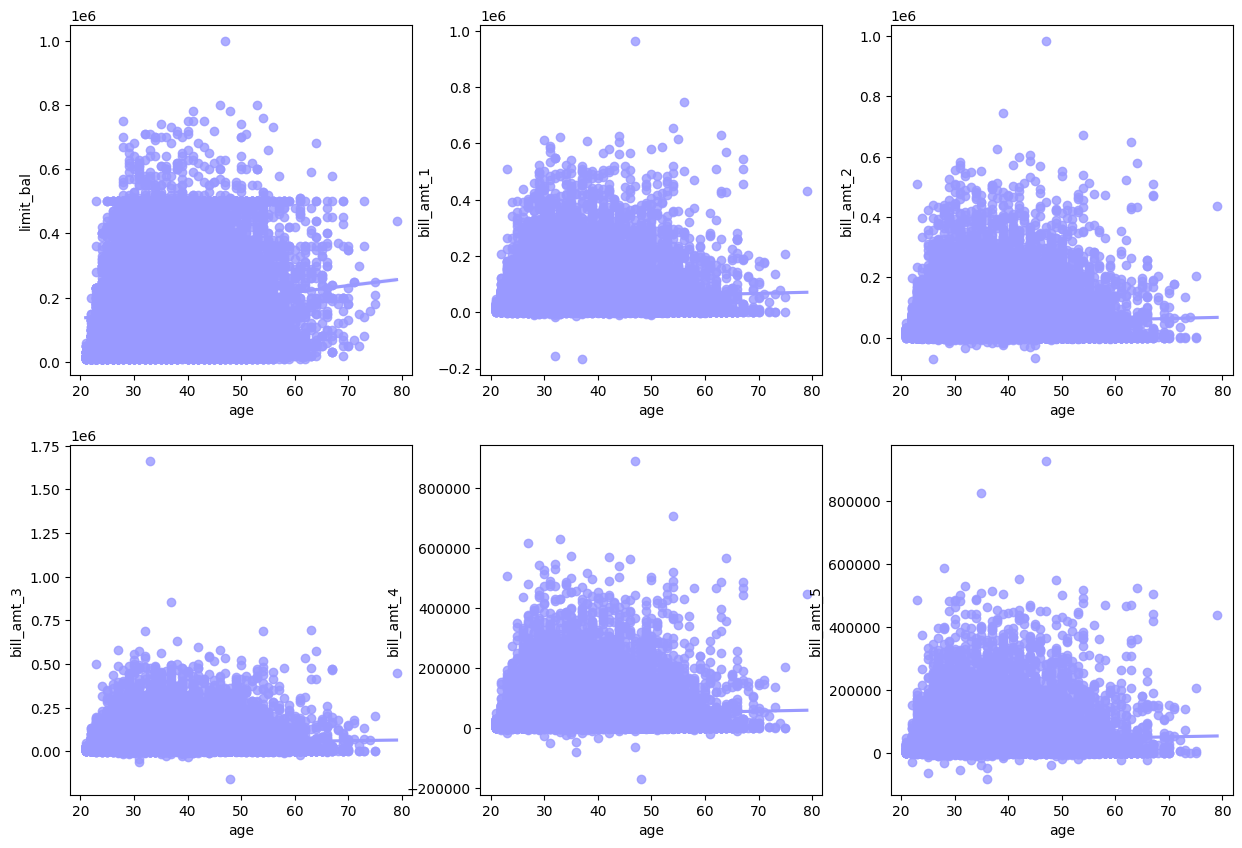

In [25]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "age", y = "limit_bal", data = df, color = "#9999FF");
sns.regplot(ax = axes[1], x = "age", y = "bill_amt_1", data = df, color = "#9999FF");
sns.regplot(ax = axes[2], x = "age", y = "bill_amt_2", data = df, color = "#9999FF");
sns.regplot(ax = axes[3], x = "age", y = "bill_amt_3", data = df, color = "#9999FF");
sns.regplot(ax = axes[4], x = "age", y = "bill_amt_4", data = df, color = "#9999FF");
sns.regplot(ax = axes[5], x = "age", y = "bill_amt_5", data = df, color = "#9999FF");

## DATASET PREPROCESSİNG

#### my func

In [34]:
def plot_confusion_matrix(y_test, y_pred):
    rec = round(recall_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, linewidths = 2, cbar = True, linecolor = "white", fmt = ".0f")
    plt.xlabel("predictions")
    plt.ylabel("original_y")
    plt.title("Recall Score: {0}".format(rec), size = 12)
    plt.show()

In [35]:
def scoring(model, x_train, y_train, x_test, y_test):

    y_prob = model.predict_proba(x_test)[:, 1]
    y_pred = model.predict(x_test)

    plot_confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    all_scores = {"Accuracy score" : accuracy_score(y_test, y_pred),
                  "Precision score" : (cm[0, 0]) / (cm[0, 1] + cm[0, 0]),
                  "Recall score" : recall_score(y_test, y_pred),
                  "F1 score" : f1_score(y_test, y_pred),
                  "ROC AUC score" : roc_auc_score(y_test, y_prob)}
    print(all_scores)
    return all_scores

In [36]:
def pca_plot(x, y):
    pca = PCA(n_components = 2)
    pca_fit = pca.fit_transform(x)
    counter = Counter(y)
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(pca_fit[row_ix, 0], pca_fit[row_ix, 1], label = str(label))
    pyplot.legend()
    pyplot.show()

### other preprocesing

In [29]:
df.head(n = 15)

limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  pay_4  \
0     20000.0    1          2         1   24      2      2     -1     -1   
1    120000.0    1          2         2   26     -1      2      0      0   
2     90000.0    1          2         2   34      0      0      0      0   
3     50000.0    1          2         1   37      0      0      0      0   
4     50000.0    0          2         1   57     -1      0     -1      0   
5     50000.0    0          1         2   37      0      0      0      0   
6    500000.0    0          1         2   29      0      0      0      0   
7    100000.0    1          2         2   23      0     -1     -1      0   
8    140000.0    1          3         1   28      0      0      2      0   
9     20000.0    0          3         2   35     -2     -2     -2     -2   
10   200000.0    1          3         2   34      0      0      2      0   
11   260000.0    1          1         2   51     -1     -1     -1     -1   
12   630000.0    1          2         2   41     -1      0     -1     -1   
13    70000.0    0          2         2   30      1      2      2      0   
14   250000.0    0          1         2   29      0      0      0      0   

    pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  bill_amt_5  \
0      -2     -2      3913.0      3102.0       689.0         0.0         0.0   
1       0      2      2682.0      1725.0      2682.0      3272.0      3455.0   
2       0      0     29239.0     14027.0     13559.0     14331.0     14948.0   
3       0      0     46990.0     48233.0     49291.0     28314.0     28959.0   
4       0      0      8617.0      5670.0     35835.0     20940.0     19146.0   
5       0      0     64400.0     57069.0     57608.0     19394.0     19619.0   
6       0      0    367965.0    412023.0    445007.0    542653.0    483003.0   
7       0     -1     11876.0       380.0       601.0       221.0      -159.0   
8       0      0     11285.0     14096.0     12108.0     12211.0     11793.0   
9      -1     -1         0.0         0.0         0.0         0.0     13007.0   
10      0     -1     11073.0      9787.0      5535.0      2513.0      1828.0   
11     -1      2     12261.0     21670.0      9966.0      8517.0     22287.0   
12     -1     -1     12137.0      6500.0      6500.0      6500.0      6500.0   
13      0      2     65802.0     67369.0     65701.0     66782.0     36137.0   
14      0      0     70887.0     67060.0     63561.0     59696.0     56875.0   

    bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  \
0          0.0        0.0      689.0        0.0        0.0        0.0   
1       3261.0        0.0     1000.0     1000.0     1000.0        0.0   
2      15549.0     1518.0     1500.0     1000.0     1000.0     1000.0   
3      29547.0     2000.0     2019.0     1200.0     1100.0     1069.0   
4      19131.0     2000.0    36681.0    10000.0     9000.0      689.0   
5      20024.0     2500.0     1815.0      657.0     1000.0     1000.0   
6     473944.0    55000.0    40000.0    38000.0    20239.0    13750.0   
7        567.0      380.0      601.0        0.0      581.0     1687.0   
8       3719.0     3329.0        0.0      432.0     1000.0     1000.0   
9      13912.0        0.0        0.0        0.0    13007.0     1122.0   
10      3731.0     2306.0       12.0       50.0      300.0     3738.0   
11     13668.0    21818.0     9966.0     8583.0    22301.0        0.0   
12      2870.0     1000.0     6500.0     6500.0     6500.0     2870.0   
13     36894.0     3200.0        0.0     3000.0     3000.0     1500.0   
14     55512.0     3000.0     3000.0     3000.0     3000.0     3000.0   

    pay_amt_6  default  
0         0.0        1  
1      2000.0        1  
2      5000.0        0  
3      1000.0        0  
4       679.0        0  
5       800.0        0  
6     13770.0        0  
7      1542.0        0  
8      1000.0        0  
9         0.0        0  
10       66.0        0  
11     3640.0        0  
12        0.

кодуєм текст в числа

In [28]:
lbe = LabelEncoder()
lbe.fit_transform(df["sex"])
df["sex"] = lbe.fit_transform(df["sex"])

lbe.fit_transform(df["marriage"])
df["marriage"] = lbe.fit_transform(df["marriage"])

In [30]:
# мої y
X = df.drop("default", axis = 1)
y = df["default"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 11)

нормалізація

In [32]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)

## OVERSAMPLING METHODS

### Logistic regression model without oversampling

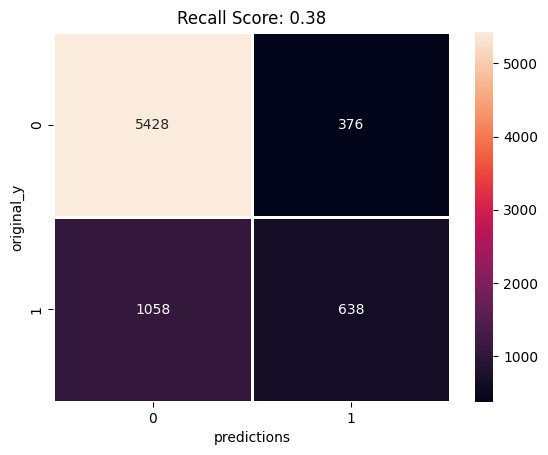

{'Accuracy score': 0.8088, 'Precision score': 0.9352170916609235, 'Recall score': 0.3761792452830189, 'F1 score': 0.4708487084870848, 'ROC AUC score': 0.760985429697151}


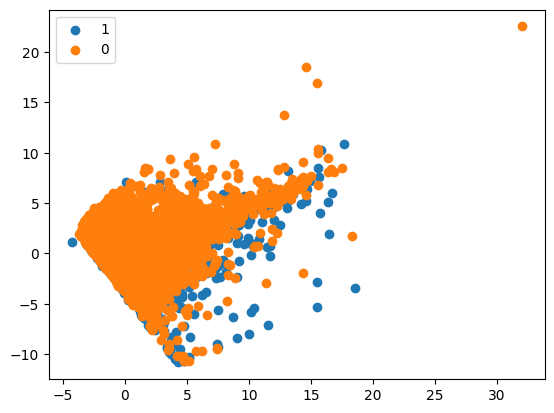

In [37]:
logistic_m = XGBClassifier()
logistic_m.fit(X_train, y_train)
scores = scoring(logistic_m, X_train, y_train, X_test, y_test)
pca_plot(X_train, y_train)

###  Random oversampling

In [38]:
ovs = RandomOverSampler(sampling_strategy = "auto", random_state = 11)
X_rovs, y_rovs = ovs.fit_resample(X_train, y_train)

logistic_m.fit(X_rovs, y_rovs)
rovs_scores = scoring(logistic_m, X_rovs, y_rovs, X_test, y_test)
pca_plot(X_rovs, y_rovs)

{'Accuracy score': 0.7558666666666667, 'Precision score': 0.806512749827705, 'Recall score': 0.5825471698113207, 'F1 score': 0.5190438665615971, 'ROC AUC score': 0.7606646115886246}


### SMOTE 
Synthetic Minority Oversampling Technique

{'Accuracy score': 0.7978666666666666, 'Precision score': 0.9071330117160579, 'Recall score': 0.423938679245283, 'F1 score': 0.4867975626269465, 'ROC AUC score': 0.7516616915139851}


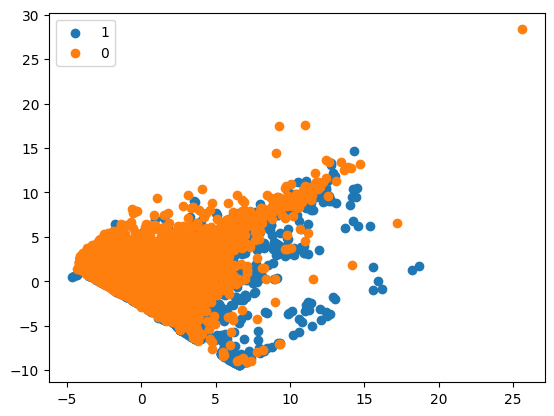

In [39]:
smovs = SMOTE(sampling_strategy = "auto", random_state = 11, k_neighbors = 7, n_jobs = -1)
X_smote, y_smote = smovs.fit_resample(X_train, y_train)

logistic_m.fit(X_smote, y_smote)
smovs_scores = scoring(logistic_m, X_smote, y_smote, X_test, y_test)
pca_plot(X_smote, y_smote)

###  Borderline SMOTE oversampling

This algorithm is a variant of the original SMOTE algorithm. Borderline samples will be detected and used to generate new synthetic samples.

In [40]:
border_smovs = BorderlineSMOTE()
X_border, y_border = border_smovs.fit_resample(X_train, y_train)

logistic_m.fit(X_border, y_border)
border_smovs_scores = scoring(logistic_m, X_border, y_border, X_test, y_test)
pca_plot(X_border, y_border)

{'Accuracy score': 0.7912, 'Precision score': 0.8945554789800138, 'Recall score': 0.4375, 'F1 score': 0.48655737704918034, 'ROC AUC score': 0.7578082332613811}


### Borderline SMOTE SVM

Synthetic data will be randomly created along the lines joining each minority class support vector with a number of its nearest neighbors. What special about Borderline-SMOTE SVM compared to the Borderline-SMOTE is that more data are synthesized away from the region of class overlap.

In [41]:
b_svm = SVMSMOTE()
X_svm, y_svm = b_svm.fit_resample(X_train, y_train)

logistic_m.fit(X_svm, y_svm)
b_svm_scores = scoring(logistic_m, X_svm, y_svm, X_test, y_test)
pca_plot(X_svm, y_svm)

{'Accuracy score': 0.7978666666666666, 'Precision score': 0.8998966230186078, 'Recall score': 0.44870283018867924, 'F1 score': 0.500987491770902, 'ROC AUC score': 0.753430356260484}


### Adaptive synthetic sampling (ADSYN)

{'Accuracy score': 0.7957333333333333, 'Precision score': 0.9035148173673329, 'Recall score': 0.4268867924528302, 'F1 score': 0.48590604026845635, 'ROC AUC score': 0.7516640788558313}


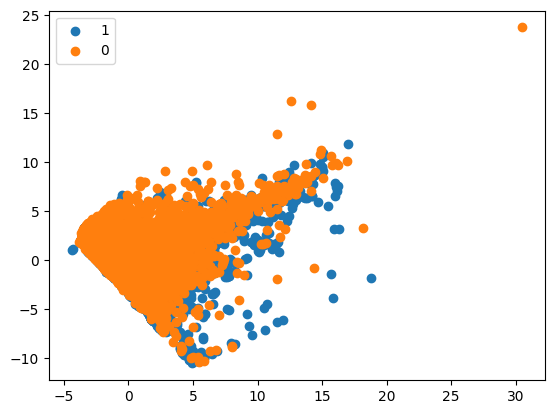

In [42]:
ada_samp = ADASYN()
X_ada, y_ada = ada_samp.fit_resample(X_train, y_train)

logistic_m.fit(X_ada, y_ada)
ada_samp_scores = scoring(logistic_m, X_ada, y_ada, X_test, y_test)
pca_plot(X_ada, y_ada)

### Table

In [44]:
scores_dataframe = pd.DataFrame(data = [scores.values(), rovs_scores.values(),
                                 smovs_scores.values(), border_smovs_scores.values(),
                                 b_svm_scores.values(), ada_samp_scores.values()], 
                                index = ["normal", "random","smote","border","svm","ada"],
                                columns = scores.keys())

scores_dataframe.style